# Design Space Exploration

## Sampling Techniques

A **sample** is a collection of design vectors $\vec{x_{A}}$ and output values $\vec{y_{A}}$ with $A=1,...,N$ being the design index and $N$ being the sample size.
These designs are choosen using a **sampling method**, i.e. the Design of Experiment (DoE).
Sampling is used to probe the design space.

In [1]:
import itertools

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

# use the searborn style
plt.style.use("seaborn-whitegrid")
# make interactive plots
plt.ion()

# %matplotlib qt
%matplotlib inline

### Full Factorial Design

In [2]:
def full_factorial(levels: int, parameters: int) -> np.ndarray:
    """Full factorial design evaluation.

    Parameters
    ----------
    levels : int
        The number of levels.
    parameters : int
        The number of parameters.

    Returns
    -------
    np.ndarray
        The full factorial design matrix of size (n, parameters).
    """
    n = levels ** parameters
    a = np.arange(0, levels, 1, dtype=float)
    a = a / np.max(a)
    return np.array(list(itertools.product(*[a for _ in range(parameters)])), dtype=float)

Create a 2D full factorial design with 4 levels.

In [3]:
levels = 4
parameters = 2  # determines the number of dimensions
ff_2d = full_factorial(levels, parameters)

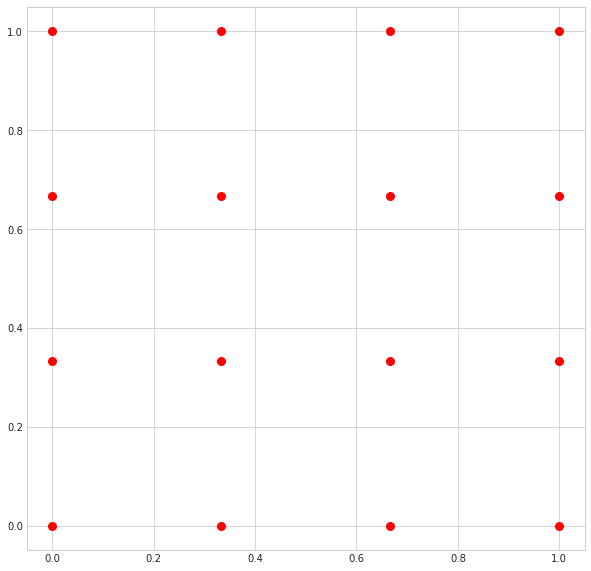

In [4]:
nrows, ncols = 1, 1
fig1 = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(nrows, ncols, figure=fig1)
ax1 = fig1.add_subplot(gs[0, 0])

ax1.plot(*ff_2d.transpose(), color="r", marker="o", ms=8, ls="")

Create a 3D full factorial design with 4 levels.

In [5]:
levels = 4
parameters = 3  # determines the number of dimensions
ff_3d = full_factorial(levels, parameters)

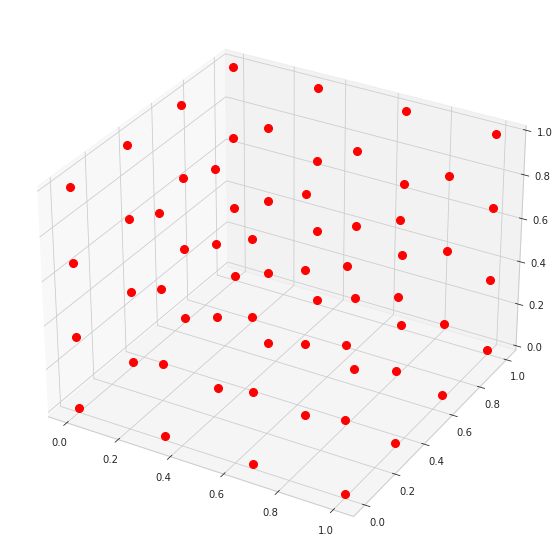

In [8]:
nrows, ncols = 1, 1
fig1 = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(nrows, ncols, figure=fig1)
ax1 = fig1.add_subplot(gs[0, 0], projection="3d")
ax1.plot(*ff_3d.transpose(), color="r", marker="o", ms=8, ls="")

### Random Sampling

Random sampling is used to probe the design space.
Sample designs are determined by $x_{i,A}=x_{i,l} + \xi \left( x_{i,u} - x_{i,l} \right) \quad \forall i \in \left[ 1,...,d \right]$.
$\xi$ is a random variable with a probability distribution 
$$P \left( \xi \right) = \begin{cases} 1, 0 < \xi < 1 \\ 0, \text{ otherwise} \end{cases}$$
The number of sample points is arbitrary, which is useful when function evaluation is expensive or the generation of sample data is not robust and may be incomplete.
Random sampling is used in **Monte Carlo Methods**, which is why it is also called **Monte Carlo Samplin**.